In [99]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [100]:
import expectexception

### Read combined dataset to pandas dataframe

In [101]:
df = pd.read_csv("../data/combinedData.csv")
provider = pd.read_csv("../data/train.csv")
provider_test = pd.read_csv("../data/test.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
df = df.merge(provider,on="Provider", how="left")

In [103]:
df.shape

(693603, 65)

In [104]:
df.groupby("PotentialFraud").size()

PotentialFraud
No     345415
Yes    212796
dtype: int64

In [105]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No


In [106]:
provider_test.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [107]:
provider.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [108]:
df.shape

(693603, 65)

### Creating df1 with new column "conditions"

In [109]:
df1 = df

In [110]:
illness = df1[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [111]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [112]:
for col in illness.columns:
    illness[col].replace(1,col, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [113]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
1,CLM66048,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
2,CLM68358,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
3,CLM38412,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0
4,CLM144521,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0


In [114]:
cols = [   "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer"
           ]

illness["conditions"] = illness[cols].values.tolist()

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
illness["conditions"] = illness["conditions"].apply(lambda x: list(filter(lambda a: a != 0, x)))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
illness["conditions"] = illness["conditions"].apply(lambda x: tuple(x))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
illness.drop(cols, axis=1, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [118]:
illness.head()

,ClaimID,conditions
0,CLM46614,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,CLM66048,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,CLM68358,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,CLM38412,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,CLM144521,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [119]:
df1 = df1.merge(illness, on="ClaimID")

In [120]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,conditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


### Extract ClaimID and boolean columns for diagnosed illness

In [121]:
diag = df[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [122]:
diag.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [123]:
diag = diag.fillna(0).set_index('ClaimID')

In [124]:
diag.head()

,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
ClaimID,,,,,,,,,,,
CLM46614,1,1,1,1,1,1,1,0,0,0,0
CLM66048,1,1,1,1,1,1,1,0,0,0,0
CLM68358,1,1,1,1,1,1,1,0,0,0,0
CLM38412,1,0,1,1,1,0,1,0,0,1,0
CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [125]:
diag.shape

(693603, 11)

### Most Frequent Items Visualization

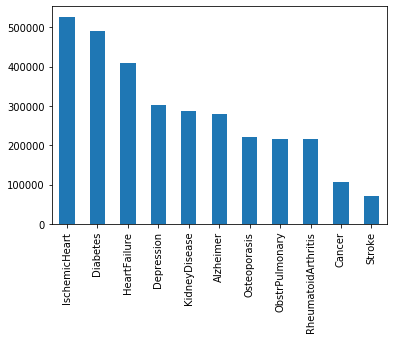

In [126]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

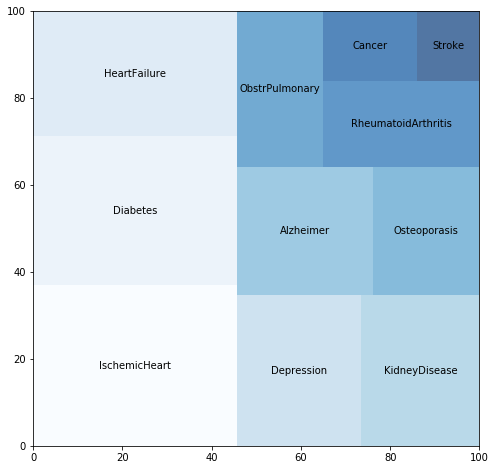

In [127]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

### Run Apriori Algorithm and Association Rules

In [128]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684
1,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296
2,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856
3,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989
4,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957


In [129]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684
1,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296
2,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856
3,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989
4,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957
...,...,...,...,...,...,...,...,...,...
1433,(Diabetes),"(IschemicHeart, KidneyDisease, ObstrPulmonary,...",0.705953,0.151849,0.141990,0.201133,1.324559,0.034792,1.061692
1434,(HeartFailure),"(IschemicHeart, Diabetes, ObstrPulmonary, Kidn...",0.591221,0.161344,0.141990,0.240165,1.488521,0.046600,1.103733
1435,(ObstrPulmonary),"(KidneyDisease, Diabetes, IschemicHeart, Heart...",0.312688,0.264699,0.141990,0.454097,1.715522,0.059222,1.346944
1436,(IschemicHeart),"(KidneyDisease, Diabetes, ObstrPulmonary, Hear...",0.759334,0.149972,0.141990,0.186994,1.246857,0.028112,1.045537


In [ ]:
#rules = rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

In [130]:
rules1 = rules[(rules['support'] >= 0.3)&(rules['lift'] >= 1)&(rules['confidence'] >= 0.7)].sort_values("lift",ascending=False)

### Create New Column with a Set of Antecedents and Consequents Rules - To merge with original Dataset

In [131]:
rules1["ante_set"] = rules1["antecedents"].apply(lambda x: tuple(x))
rules1["con_set"] = rules1["consequents"].apply(lambda x: tuple(x))

In [132]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
371,(KidneyDisease),"(Diabetes, IschemicHeart)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(Diabetes, IschemicHeart)"
60,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)"
368,"(IschemicHeart, KidneyDisease)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(IschemicHeart, KidneyDisease)","(Diabetes,)"
43,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)"
407,(HeartFailure),"(Diabetes, IschemicHeart)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(Diabetes, IschemicHeart)"


In [133]:
rules1['conditions'] = rules1['ante_set'] + rules1['con_set']
#rules['conditions'] = rules.apply(lambda x: x['ante_set'].union(x['con_set']), axis=1)

In [134]:
rules1.shape

(20, 12)

In [135]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,conditions
371,(KidneyDisease),"(Diabetes, IschemicHeart)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(Diabetes, IschemicHeart)","(KidneyDisease, Diabetes, IschemicHeart)"
60,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)"
368,"(IschemicHeart, KidneyDisease)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(IschemicHeart, KidneyDisease)","(Diabetes,)","(IschemicHeart, KidneyDisease, Diabetes)"
43,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)","(KidneyDisease, Diabetes)"
407,(HeartFailure),"(Diabetes, IschemicHeart)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(Diabetes, IschemicHeart)","(HeartFailure, Diabetes, IschemicHeart)"


AttributeError: module 'matplotlib' has no attribute 'yticks'

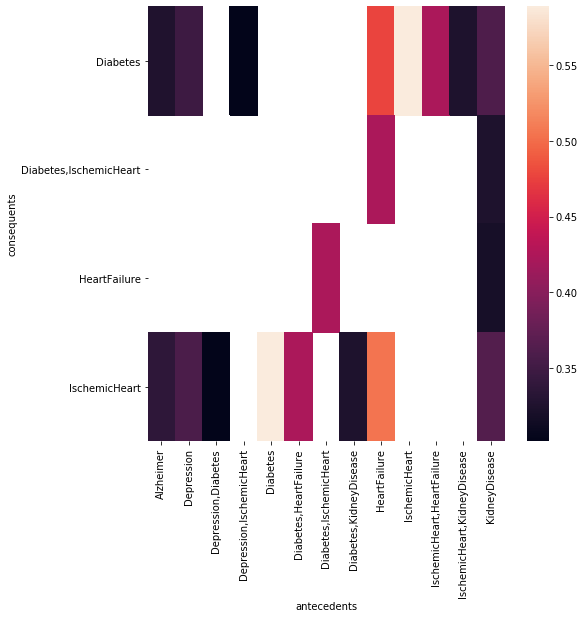

In [136]:
# Replace frozen sets with strings
rules1['antecedents'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules1.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)

# Format and display plot
plt.yticks(rotation=0)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'yticks'

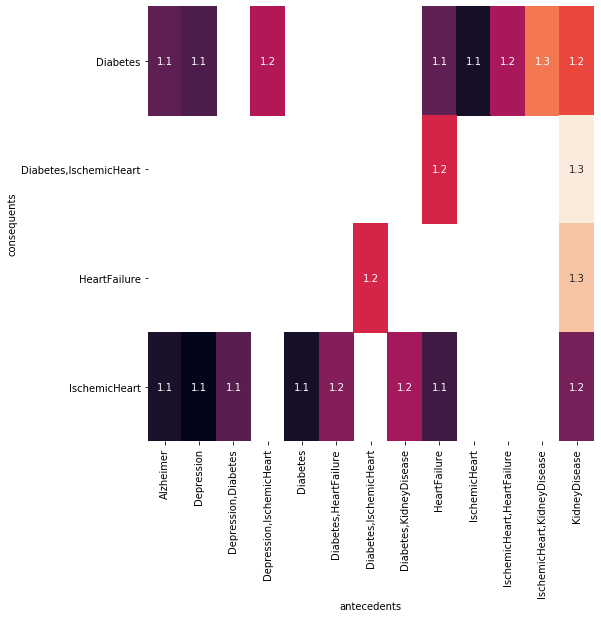

In [137]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules1.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

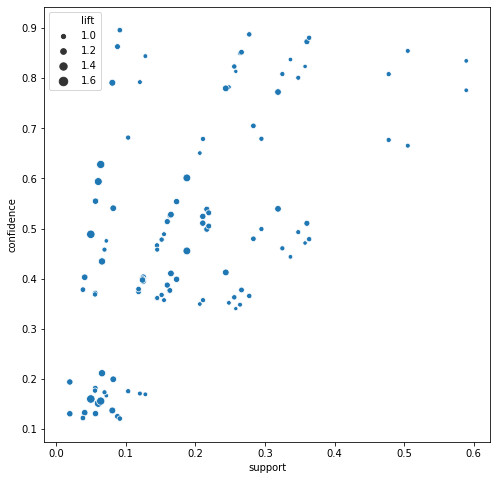

In [138]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(diag, min_support = 0.0075, 
                         use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules =association_rules(frequent_itemsets, metric = "support", 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

In [98]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,conditions,antecedent,consequent,rule
371,KidneyDisease,"Diabetes,IschemicHeart",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(Diabetes, IschemicHeart)","(KidneyDisease, Diabetes, IschemicHeart)",K,D,371
60,KidneyDisease,HeartFailure,0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",K,H,60
368,"IschemicHeart,KidneyDisease",Diabetes,0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(IschemicHeart, KidneyDisease)","(Diabetes,)","(IschemicHeart, KidneyDisease, Diabetes)",I,D,368
43,KidneyDisease,Diabetes,0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)","(KidneyDisease, Diabetes)",K,D,43
407,HeartFailure,"Diabetes,IschemicHeart",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(Diabetes, IschemicHeart)","(HeartFailure, Diabetes, IschemicHeart)",H,D,407
402,"Diabetes,IschemicHeart",HeartFailure,0.589180,0.591221,0.423662,0.719070,1.216245,0.075326,1.455090,"(Diabetes, IschemicHeart)","(HeartFailure,)","(Diabetes, IschemicHeart, HeartFailure)",D,H,402
132,"Depression,IschemicHeart",Diabetes,0.357706,0.705953,0.301345,0.842438,1.193335,0.048822,1.866235,"(Depression, IschemicHeart)","(Diabetes,)","(Depression, IschemicHeart, Diabetes)",D,D,132
404,"IschemicHeart,HeartFailure",Diabetes,0.505207,0.705953,0.423662,0.838590,1.187885,0.067009,1.821746,"(IschemicHeart, HeartFailure)","(Diabetes,)","(IschemicHeart, HeartFailure, Diabetes)",I,D,404
367,"Diabetes,KidneyDisease",IschemicHeart,0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)","(Diabetes, KidneyDisease, IschemicHeart)",D,I,367
403,"Diabetes,HeartFailure",IschemicHeart,0.477801,0.759334,0.423662,0.886691,1.167723,0.060852,2.123987,"(Diabetes, HeartFailure)","(IschemicHeart,)","(Diabetes, HeartFailure, IschemicHeart)",D,I,403


In [140]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,conditions,antecedent,consequent,rule
371,KidneyDisease,"Diabetes,IschemicHeart",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(Diabetes, IschemicHeart)","(KidneyDisease, Diabetes, IschemicHeart)",K,D,371
60,KidneyDisease,HeartFailure,0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",K,H,60
368,"IschemicHeart,KidneyDisease",Diabetes,0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(IschemicHeart, KidneyDisease)","(Diabetes,)","(IschemicHeart, KidneyDisease, Diabetes)",I,D,368
43,KidneyDisease,Diabetes,0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)","(KidneyDisease, Diabetes)",K,D,43
407,HeartFailure,"Diabetes,IschemicHeart",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(Diabetes, IschemicHeart)","(HeartFailure, Diabetes, IschemicHeart)",H,D,407
402,"Diabetes,IschemicHeart",HeartFailure,0.589180,0.591221,0.423662,0.719070,1.216245,0.075326,1.455090,"(Diabetes, IschemicHeart)","(HeartFailure,)","(Diabetes, IschemicHeart, HeartFailure)",D,H,402
132,"Depression,IschemicHeart",Diabetes,0.357706,0.705953,0.301345,0.842438,1.193335,0.048822,1.866235,"(Depression, IschemicHeart)","(Diabetes,)","(Depression, IschemicHeart, Diabetes)",D,D,132
404,"IschemicHeart,HeartFailure",Diabetes,0.505207,0.705953,0.423662,0.838590,1.187885,0.067009,1.821746,"(IschemicHeart, HeartFailure)","(Diabetes,)","(IschemicHeart, HeartFailure, Diabetes)",I,D,404
367,"Diabetes,KidneyDisease",IschemicHeart,0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)","(Diabetes, KidneyDisease, IschemicHeart)",D,I,367
403,"Diabetes,HeartFailure",IschemicHeart,0.477801,0.759334,0.423662,0.886691,1.167723,0.060852,2.123987,"(Diabetes, HeartFailure)","(IschemicHeart,)","(Diabetes, HeartFailure, IschemicHeart)",D,I,403


In [149]:
rules1.iloc[1,0].split(',')

['KidneyDisease']

TypeError: 'module' object is not callable

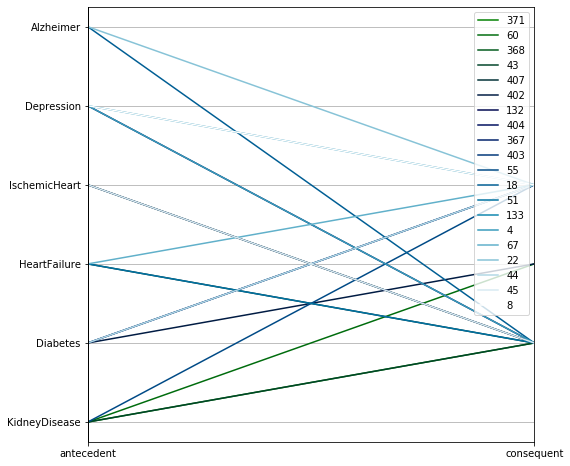

In [150]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
# frequent_itemsets = apriori(diag, min_support = 0.05, 
#                          use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
# rules = association_rules(frequent_itemsets, metric = 'confidence', 
#                           min_threshold = 0.50)


# Convert rules into coordinates suitable for use in a parallel coordinates plot
# rules1['antecedent'] = rules1['antecedents'].apply(lambda antecedent: list(antecedent)[0])
# rules1['consequent'] = rules1['consequents'].apply(lambda consequent: list(consequent)[0])
rules1['antecedent'] = rules1['antecedents'].apply(lambda antecedent: antecedent.split(',')[0])
rules1['consequent'] = rules1['consequents'].apply(lambda consequent: consequent.split(',')[0])
rules1['rule'] = rules1.index
coords = rules1[['antecedent','consequent','rule']]

# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')
plt.legend([])
plt.show()


### Plot Output and Filtered Rules

In [146]:
lift=rules['lift'].values
support=rules['support'].values
confidence=rules['confidence'].values
conviction=rules['conviction'].values

In [147]:
lift.max()

1.8361284683046184

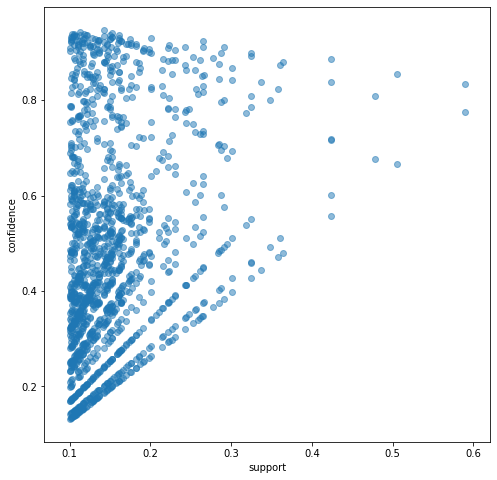

In [148]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

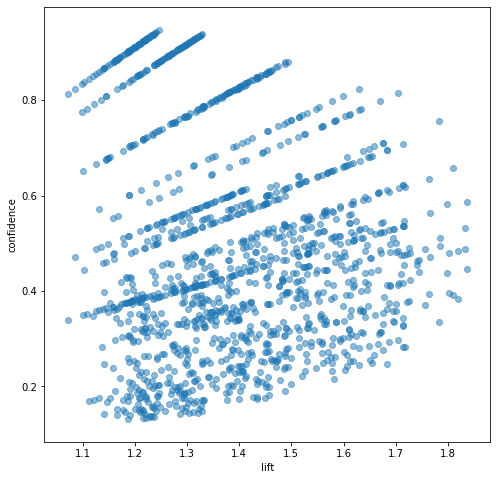

In [149]:
for i in range (len(lift)):
    lift[i] = lift[i]
    confidence[i] = confidence[i]

plt.scatter(lift, confidence, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

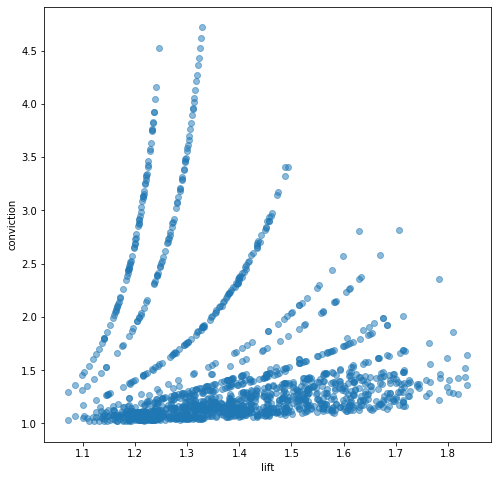

In [150]:
for i in range (len(lift)):
    lift[i] = lift[i]
    conviction[i] = conviction[i]

plt.scatter(lift, conviction, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('conviction') 
plt.show()

### Combining df1 with Rules

In [151]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,conditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [152]:
df1.shape

(693603, 66)

In [154]:
df1_rules = df1.merge(rules1, on="conditions")

In [155]:
df1_rules.shape

(32020, 77)

In [156]:
df1_rules.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,conditions,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
0,168,BENE11149,CLM35890,2009-01-28,2009-02-02,PRV55005,12000,PHY409386,NaN,NaN,2009-01-28,03842,1068.0,2009-02-02,857,0380,262,79902,34400,78552,49320,2767,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1948-04-01,NaN,0,1,0,New York,800,12,12,0,0,1,0,0,0,1,1,0,0,0,12000,1068,0,0,0,3,0,9,6.0,6,61.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)"
1,930,BENE11907,CLM41555,2009-03-07,2009-03-15,PRV51949,8000,PHY361453,PHY361453,NaN,2009-03-07,25013,1068.0,2009-03-15,639,25080,70720,5852,4148,59080,V4582,2699,2724,5990,5859,9904.0,NaN,NaN,NaN,NaN,NaN,Train,in,1919-04-01,NaN,0,1,0,Connecticut,20,12,12,0,0,1,0,0,0,1,1,0,0,0,8000,1068,200,10,0,3,1,11,9.0,9,90.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)"
2,1107,BENE12002,CLM55644,2009-06-15,2009-06-21,PRV54781,5000,PHY360771,PHY312292,NaN,2009-06-15,5849,1068.0,2009-06-21,657,5849,4019,E9422,25002,41401,V4502,2761,53081,5809,0414,9904.0,7802.0,2724.0,NaN,NaN,NaN,Train,in,1910-06-01,NaN,0,1,0,New Jersey,310,12,12,0,0,1,0,0,0,1,1,0,0,0,5120,1068,0,0,0,3,3,11,7.0,7,99.0,Yes,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)"
3,1850,BENE12758,CLM58929,2009-07-09,2009-07-10,PRV56684,4000,PHY321931,NaN,NaN,2009-07-09,4589,1068.0,2009-07-10,256,4254,41401,V4579,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1928-02-01,NaN,0,1,0,Texas,752,12,12,0,0,1,0,0,0,1,1,0,0,0,4050,1068,320,70,0,3,0,5,2.0,2,81.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)"
4,2533,BENE13311,CLM33809,2009-01-14,2009-01-26,PRV51145,28000,PHY329774,PHY354983,NaN,2009-01-14,00845,1068.0,2009-01-26,331,5579,41401,4019,53540,V1251,5859,5119,5570,1976,NaN,4576.0,NaN,NaN,NaN,NaN,NaN,Train,in,1924-07-01,NaN,0,1,0,Arizona,90,12,12,0,0,1,0,0,0,1,1,0,0,0,28000,1068,0,0,0,3,1,10,13.0,13,85.0,Yes,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)"


In [157]:
df1_rules.groupby("PotentialFraud").size()

PotentialFraud
No     16113
Yes     9617
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f937e43ec50>,
      dtype=object)

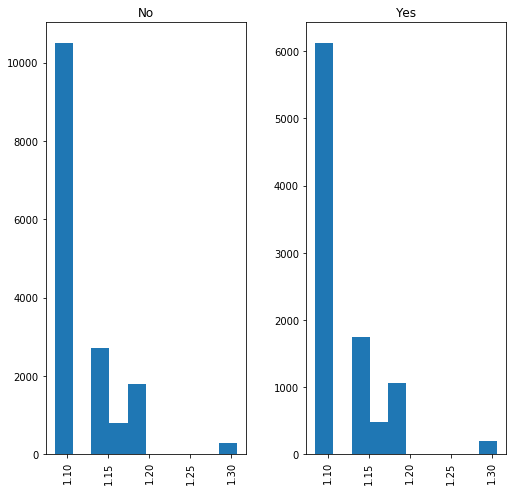

In [158]:
df1_rules[["lift","PotentialFraud"]].hist(by = "PotentialFraud")

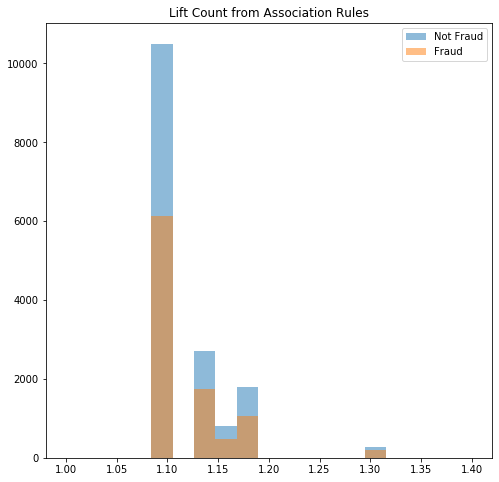

In [160]:
from matplotlib import pyplot

x = df1_rules[df1_rules["PotentialFraud"]=="No"]["lift"]
y = df1_rules[df1_rules["PotentialFraud"]=="Yes"]["lift"]


bins = np.linspace(1.0, 1.4, 20)
pyplot.hist(x, bins, alpha=0.5, label='Not Fraud')
pyplot.hist(y, bins, alpha=0.5, label='Fraud')
pyplot.legend(loc='upper right')
pyplot.title("Lift Count from Association Rules")
pyplot.show()

### Analyse Results with Diagnosis and Procedure Codes

In [161]:
df_ip = pd.read_csv("../data/code_specialty_ip.csv")
df_op = pd.read_csv("../data/code_specialty_op.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
df_ip.shape

(40474, 73)

In [163]:
df_op.shape

(517737, 70)

In [167]:
df_ipop = pd.concat([df_ip,df_op],join='inner').merge(provider, on="Provider")

In [168]:
df_ipop.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66.0,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,Yes
1,1882,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,95.0,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,Yes
2,2964,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,1068.0,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0,Yes
3,3311,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,2,0,2,0,1,1,0,0,0,0,0,0,0,0,2,0,0,Yes
4,3729,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,1748,1068.0,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,1925-09-01,NaN,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,83.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Yes


In [169]:
df_ipop.shape

(558211, 71)

In [170]:
df_ipop.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'I

In [171]:
df_ipop = df_ipop[["ClaimID", 'cardiology', 'urology', 'endocrinology', 'emergency', 'general', 'infectious', 'oncology', 'hematology', 'psychiatry', 'neurology', 'pulmonology', 'gastroenterology', 'ob-gyn', 'dermatology', 'orthopedics', 'congenital', 'neonatology']]

In [172]:
df_ipop

,ClaimID,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,CLM46614,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0
1,CLM34721,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0
2,CLM72336,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0
3,CLM73394,2,0,2,0,1,1,0,0,0,0,0,0,0,0,2,0,0
4,CLM32911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,CLM184358,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
558207,CLM603185,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
558208,CLM460770,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
558209,CLM306999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
df_ipop = df1_rules.merge(df_ipop, on="ClaimID")

In [175]:
df_ipop

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,conditions,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,168,BENE11149,CLM35890,2009-01-28,2009-02-02,PRV55005,12000,PHY409386,NaN,NaN,2009-01-28,03842,1068.0,2009-02-02,857,0380,262,79902,34400,78552,49320,2767,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1948-04-01,NaN,0,1,0,New York,800,12,12,0,0,1,0,0,0,1,1,0,0,0,12000,1068,0,0,0,3,0,9,6.0,6,61.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",0,1,1,0,2,2,0,0,0,1,1,0,0,0,0,0,0
1,930,BENE11907,CLM41555,2009-03-07,2009-03-15,PRV51949,8000,PHY361453,PHY361453,NaN,2009-03-07,25013,1068.0,2009-03-15,639,25080,70720,5852,4148,59080,V4582,2699,2724,5990,5859,9904.0,NaN,NaN,NaN,NaN,NaN,Train,in,1919-04-01,NaN,0,1,0,Connecticut,20,12,12,0,0,1,0,0,0,1,1,0,0,0,8000,1068,200,10,0,3,1,11,9.0,9,90.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",2,4,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1107,BENE12002,CLM55644,2009-06-15,2009-06-21,PRV54781,5000,PHY360771,PHY312292,NaN,2009-06-15,5849,1068.0,2009-06-21,657,5849,4019,E9422,25002,41401,V4502,2761,53081,5809,0414,9904.0,7802.0,2724.0,NaN,NaN,NaN,Train,in,1910-06-01,NaN,0,1,0,New Jersey,310,12,12,0,0,1,0,0,0,1,1,0,0,0,5120,1068,0,0,0,3,3,11,7.0,7,99.0,Yes,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",3,2,2,2,1,1,0,0,0,0,0,1,0,0,0,0,0
3,1850,BENE12758,CLM58929,2009-07-09,2009-07-10,PRV56684,4000,PHY321931,NaN,NaN,2009-07-09,4589,1068.0,2009-07-10,256,4254,41401,V4579,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1928-02-01,NaN,0,1,0,Texas,752,12,12,0,0,1,0,0,0,1,1,0,0,0,4050,1068,320,70,0,3,0,5,2.0,2,81.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,2533,BENE13311,CLM33809,2009-01-14,2009-01-26,PRV51145,28000,PHY329774,PHY354983,NaN,2009-01-14,00845,1068.0,2009-01-26,331,5579,41401,4019,53540,V1251,5859,5119,5570,1976,NaN,4576.0,NaN,NaN,NaN,NaN,NaN,Train,in,1924-07-01,NaN,0,1,0,Arizona,90,12,12,0,0,1,0,0,0,1,1,0,0,0,28000,1068,0,0,0,3,1,10,13.0,13,85.0,Yes,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",2,1,0,0,1,1,1,0,0,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,.

In [206]:
df_ipop_group = df_ipop[[
           "ClaimID",
           "PotentialFraud",
           "conditions",
           "lift",
           "confidence",
           "general",
           "cardiology", 
           "endocrinology", 
           "infectious",
           "urology",
           "orthopedics",   
           "gastroenterology",
           "neurology",
           "oncology",
           "hematology",
           "emergency",
           "pulmonology",
           "psychiatry",
           "dermatology",
           "ob-gyn",
           "congenital",
           "neonatology"]]

#"Depression","Alzheimer","RheumatoidArthritis", "Diabetes", "KidneyDisease","IschemicHeart",
#"Stroke","Osteoporasis", "ObstrPulmonary", "HeartFailure","Cancer"

In [229]:
df_ipop_group.sort_values(["lift", "confidence","general","cardiology"],ascending=False).head(100)

,ClaimID,PotentialFraud,conditions,lift,confidence,general,cardiology,endocrinology,infectious,urology,orthopedics,gastroenterology,neurology,oncology,hematology,emergency,pulmonology,psychiatry,dermatology,ob-gyn,congenital,neonatology
25682,CLM644295,Yes,"(KidneyDisease, HeartFailure)",1.306488,0.772424,4,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
25289,CLM55961,Yes,"(KidneyDisease, HeartFailure)",1.306488,0.772424,4,2,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0
25371,CLM543441,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424,4,1,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0
25714,CLM569651,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424,4,1,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0
25494,CLM398040,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424,4,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0
25271,CLM68095,Yes,"(KidneyDisease, HeartFailure)",1.306488,0.772424,3,3,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
25282,CLM75916,Yes,"(KidneyDisease, HeartFailure)",1.306488,0.772424,3,3,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0
25389,CLM282101,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424,3,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0
25489,CLM488679,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424,3,2,0,0,1,1,2,0,1,0,0,0,1,0,0,0,0
25540,CLM720857,Yes,"(KidneyDisease, HeartFailure)",1.306488,0.772424,3,2,0,0,2,0,2,0,0,0,1,0,0,1,0,0,0


<Figure size 1440x720 with 0 Axes>

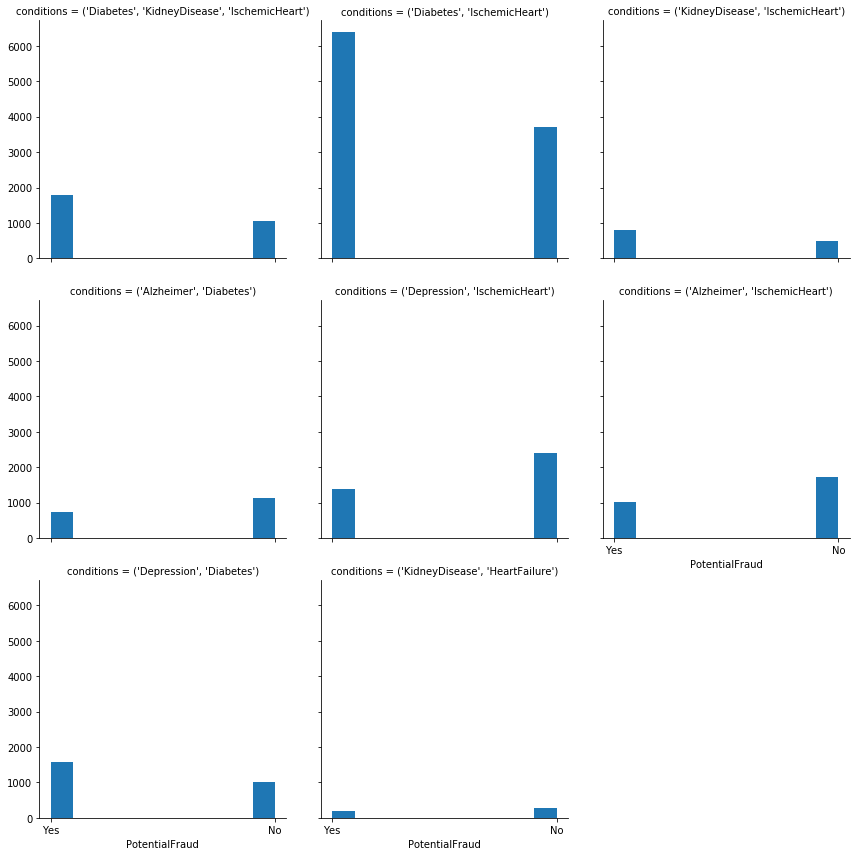

In [253]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(df_ipop_group, col="conditions", col_wrap=3,size=4)
g = g.map(plt.hist, "PotentialFraud")

In [224]:
df_ipop_group[df_ipop_group["conditions"]==("Diabetes","IschemicHeart")]

,ClaimID,PotentialFraud,conditions,lift,confidence,general,cardiology,endocrinology,infectious,urology,orthopedics,gastroenterology,neurology,oncology,hematology,emergency,pulmonology,psychiatry,dermatology,ob-gyn,congenital,neonatology
2867,CLM55364,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,3,3,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0
2868,CLM71278,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2869,CLM341380,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2870,CLM664205,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2871,CLM68646,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,1,5,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,CLM267226,Yes,"(Diabetes, IschemicHeart)",1.099106,0.834588,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12974,CLM428907,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
12975,CLM547049,No,"(Diabetes, IschemicHeart)",1.099106,0.834588,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12976,CLM566286,Yes,"(Diabetes, IschemicHeart)",1.099106,0.834588,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [245]:
df_ipop.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,conditions,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,168,BENE11149,CLM35890,2009-01-28,2009-02-02,PRV55005,12000,PHY409386,NaN,NaN,2009-01-28,03842,1068.0,2009-02-02,857,0380,262,79902,34400,78552,49320,2767,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1948-04-01,NaN,0,1,0,New York,800,12,12,0,0,1,0,0,0,1,1,0,0,0,12000,1068,0,0,0,3,0,9,6.0,6,61.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",0,1,1,0,2,2,0,0,0,1,1,0,0,0,0,0,0
1,930,BENE11907,CLM41555,2009-03-07,2009-03-15,PRV51949,8000,PHY361453,PHY361453,NaN,2009-03-07,25013,1068.0,2009-03-15,639,25080,70720,5852,4148,59080,V4582,2699,2724,5990,5859,9904.0,NaN,NaN,NaN,NaN,NaN,Train,in,1919-04-01,NaN,0,1,0,Connecticut,20,12,12,0,0,1,0,0,0,1,1,0,0,0,8000,1068,200,10,0,3,1,11,9.0,9,90.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",2,4,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1107,BENE12002,CLM55644,2009-06-15,2009-06-21,PRV54781,5000,PHY360771,PHY312292,NaN,2009-06-15,5849,1068.0,2009-06-21,657,5849,4019,E9422,25002,41401,V4502,2761,53081,5809,0414,9904.0,7802.0,2724.0,NaN,NaN,NaN,Train,in,1910-06-01,NaN,0,1,0,New Jersey,310,12,12,0,0,1,0,0,0,1,1,0,0,0,5120,1068,0,0,0,3,3,11,7.0,7,99.0,Yes,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",3,2,2,2,1,1,0,0,0,0,0,1,0,0,0,0,0
3,1850,BENE12758,CLM58929,2009-07-09,2009-07-10,PRV56684,4000,PHY321931,NaN,NaN,2009-07-09,4589,1068.0,2009-07-10,256,4254,41401,V4579,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1928-02-01,NaN,0,1,0,Texas,752,12,12,0,0,1,0,0,0,1,1,0,0,0,4050,1068,320,70,0,3,0,5,2.0,2,81.0,No,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,2533,BENE13311,CLM33809,2009-01-14,2009-01-26,PRV51145,28000,PHY329774,PHY354983,NaN,2009-01-14,00845,1068.0,2009-01-26,331,5579,41401,4019,53540,V1251,5859,5119,5570,1976,NaN,4576.0,NaN,NaN,NaN,NaN,NaN,Train,in,1924-07-01,NaN,0,1,0,Arizona,90,12,12,0,0,1,0,0,0,1,1,0,0,0,28000,1068,0,0,0,3,1,10,13.0,13,85.0,Yes,"(Diabetes, KidneyDisease, IschemicHeart)","(Diabetes, KidneyDisease)",(IschemicHeart),0.36031,0.759334,0.323995,0.899213,1.184213,0.0504,2.387861,"(Diabetes, KidneyDisease)","(IschemicHeart,)",2,1,0,0,1,1,1,0,0,0,1,3,0,0,0,0,0


In [249]:
df_ipop_heat1 = df_ipop[[
    "Alzheimer",
    "HeartFailure",
    "KidneyDisease",
    "Cancer",
    "ObstrPulmonary",
    "Depression",
    "Diabetes",
    "IschemicHeart",
    "Osteoporasis",
    "RheumatoidArthritis",
    "Stroke"]]
df_ipop_heat2 = df_ipop[[
    "general",
           "cardiology", 
           "endocrinology", 
           "infectious",
           "urology",
           "orthopedics",   
           "gastroenterology",
           "neurology",
           "oncology",
           "hematology",
           "emergency",
           "pulmonology",
           "psychiatry",
           "dermatology",
           "ob-gyn",
           "congenital",
           "neonatology"]]

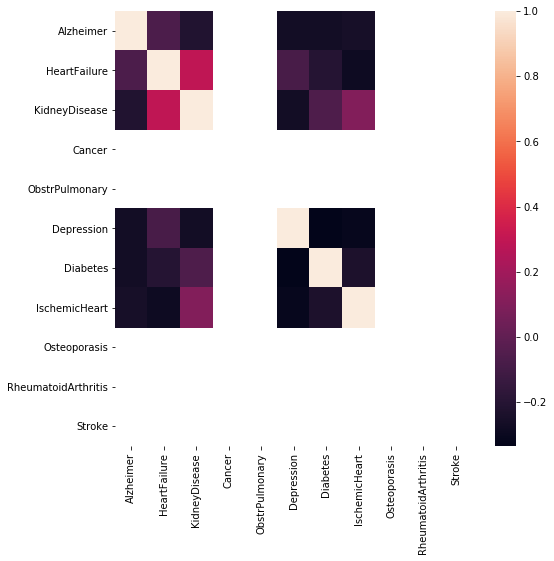

In [250]:
heat_map = sns.heatmap(df_ipop_heat1.corr())

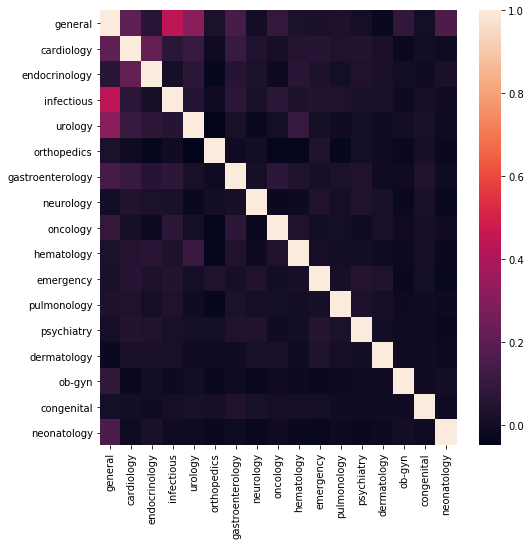

In [251]:
heat_map = sns.heatmap(df_ipop_heat2.corr())